# Capstone Project - The Battle of Neighborhoods
## WK4 and WK5

## Introduction

The purpose of this project is using the skills and the tools in previous weeks and lessons to use location data to explore a geographical location together with Foursquare location data to explore or compare neighborhoods or cities of choice or a problem to solve.

## Scenario

The lockdown is going to end, so it is a good time to explore the opportunity to get a new home in Sheffield, UK. I stayed there before and I love there. I have the following requirements:

1. It should be convenince to get foods and daily essentials.
2. Low crime rate
3. People with nmoderate and above income. 
4. With certain populations and avoid too countryside area.

## Data Source

The following data will be used in the works:
1. Geo information from geolocator API
2. Sheffield postal code, https://www.postcodearea.co.uk/postaltowns/sheffield/
3. Sheffield postal code map, https://en.wikipedia.org/wiki/S_postcode_area
4. UK Crime map, https://www.ukcrimestats.com/
5. Fourguide API

Sadly they are not in JSON or well formatted, they will be formatted as csv to import.

## 1. Download and Explore Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!conda install -c anaconda beautifulsoup4 -y

from urllib.request import urlopen
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.3       |     pyhb0f4dca_0          87 KB  anaconda
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  beautifulsoup4     anaconda/noarch::beautifulsoup4-4.9.3-pyhb0f4dca_0
  soupsieve          anaconda/noarch::soupsieve-2.0.1-py_0

The following pa

In [7]:
#Read data
df=pd.read_csv('neighborhood.csv')

#Collect Postal Code mapping
df_area = df[{'Postal Code', 'Area'}]
df_area.set_index('Postal Code')
df_area.rename(columns={"Postal Code": "postal_code", "Area": "name"}, inplace=True)
df_area

,postal_code,name
0,S1,Orchard Square
1,S2,Arbourthorne
2,S3,Burngreave
3,S4,Grimesthorpe
4,S5,Firth Park
5,S6,Hillsborough
6,S7,Beauchief
7,S8,Norton Woodseats
8,S9,Attercliffe
9,S10,Fulwood


In [5]:
print('The dataframe has {} area and {} neighborhoods.'.format(
        len(df_area['name'].unique()),
        df.shape[0]
    )
)

The dataframe has 43 area and 45 neighborhoods.


In [9]:
#Tranverse separated neighborhood into multiple column and map with area
df.rename(columns={"Postal Code": "postal_code", "Area": "area", "Neighborhood": "neighborhood"}, inplace=True)
df['neighborhood'] = df['neighborhood'].str.split(',')
#df=df.reset_index(['postal_code'])
df = df.explode('neighborhood')
df["neighborhood"]  = df["neighborhood"].str.strip()
#print(df['neighborhood'])

pd.options.mode.chained_assignment = None 
df_neighborhood = pd.merge(df, df_area, left_on = 'neighborhood', right_on = 'postal_code',  how='left')
df_neighborhood.drop(['neighborhood'], axis=1, inplace=True)
df_neighborhood.rename(columns={"postal_code_x": "postal_code", "name": "neighborhood", 'postal_code_y' : "neighborhood_postal_code"}, inplace=True)

#df_neighborhood=df_neighborhood.reset_index([0, 'area'])
df_neighborhood.head()


,postal_code,area,neighborhood_postal_code,neighborhood
0,S1,Orchard Square,S2,Arbourthorne
1,S1,Orchard Square,S3,Burngreave
2,S1,Orchard Square,S4,Grimesthorpe
3,S1,Orchard Square,S6,Hillsborough
4,S1,Orchard Square,S10,Fulwood


In [10]:
#Address tester
address = 'The Meadows, Todwick, Sheffield S26'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address + ', United Kingdom')
print(location)
if location is None:
    location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(location, latitude, longitude))

Kiveton Park Meadows Junior School, Storth Lane, Wales, Rotherham, Yorkshire and the Humber, England, S26 5QT, United Kingdom
The geograpical coordinate of Kiveton Park Meadows Junior School, Storth Lane, Wales, Rotherham, Yorkshire and the Humber, England, S26 5QT, United Kingdom are 53.3461131, -1.2767591265409763.


In [11]:
df_area_xy = df_neighborhood[{'postal_code','area'}]
df_area_xy.drop_duplicates(subset=['postal_code'], inplace=True)
df_area_xy

,area,postal_code
0,Orchard Square,S1
6,Arbourthorne,S2
13,Burngreave,S3
18,Grimesthorpe,S4
21,Firth Park,S5
26,Hillsborough,S6
31,Beauchief,S7
35,Norton Woodseats,S8
39,Attercliffe,S9
45,Fulwood,S10


In [12]:
#Collect coordinate and merge back to df
latitude = [] 
longitude = [] 

geolocator = Nominatim(user_agent="ny_explorer")
for index, row in df_area_xy.iterrows(): 
    location = geolocator.geocode(row['area'] + ' ' + row['postal_code'] +', Sheffield, United Kingdom') #More accurate
    if location is None:
        location = geolocator.geocode(row['area']+ ' ' + row['postal_code'] + ', United Kingdom') #Handle exception case
    #print('The geograpical coordinate of {}.'.format(row['neighbourhood']))
    if location is not None:
        latitude.append(location.latitude) 
        longitude.append(location.longitude)
        print('The geograpical coordinate of {} are {}, {}.'.format(location, location.latitude, location.longitude))
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)
df_area_xy['latitude'] = latitude
df_area_xy['longitude'] = longitude
df_area_xy.head

The geograpical coordinate of Orchard Square, City Centre, Sheffield, Yorkshire and the Humber, England, S1 2FB, United Kingdom are 53.3816738, -1.4705044.
The geograpical coordinate of Arbourthorne, Sheffield, Yorkshire and the Humber, England, S2 2FL, United Kingdom are 53.3613888, -1.4431226.
The geograpical coordinate of Burngreave, Sheffield, Yorkshire and the Humber, England, S4 7HQ, United Kingdom are 53.3939876, -1.45832.
The geograpical coordinate of Grimesthorpe, Sheffield, Yorkshire and the Humber, England, S4 8EZ, United Kingdom are 53.4070424, -1.4397035.
The geograpical coordinate of Firth Park, Sheffield, Yorkshire and the Humber, England, S5 6HB, United Kingdom are 53.4184353, -1.4462956.
The geograpical coordinate of Hillsborough Stadium, Penistone Road North, Middlewood, Wadsley Bridge, Sheffield, Yorkshire and the Humber, England, S6 1SW, United Kingdom are 53.4113729, -1.5006348419862217.
The geograpical coordinate of Beauchief, Sheffield, Yorkshire and the Humber, 

<bound method NDFrame.head of                          area postal_code   latitude  longitude
0              Orchard Square          S1  53.381674  -1.470504
6                Arbourthorne          S2  53.361389  -1.443123
13                 Burngreave          S3  53.393988  -1.458320
18               Grimesthorpe          S4  53.407042  -1.439704
21                 Firth Park          S5  53.418435  -1.446296
26               Hillsborough          S6  53.411373  -1.500635
31                  Beauchief          S7  53.335309  -1.500887
35           Norton Woodseats          S8  53.327421  -1.473432
39                Attercliffe          S9  53.392270  -1.430267
45                    Fulwood         S10  53.365013  -1.543243
51                  Ecclesall         S11  53.355774  -1.511037
55               Hackenthorpe         S12  53.343606  -1.381049
62                 Handsworth         S13  53.372300  -1.383012
68                 Rollestone         S14  53.346896  -1.441027
72        

In [13]:
#Clean up and remove NaN data.

pd.options.mode.chained_assignment = None 
df_neighborhood_1 = pd.merge(df_neighborhood, df_area_xy, left_on = 'neighborhood_postal_code', right_on = 'postal_code',  how='left')
df_neighborhood_1.drop(['postal_code_y','area_y'], axis=1, inplace=True)
df_neighborhood_1.rename(columns={"postal_code_x": "postal_code", "area_x": "area"}, inplace=True)

#Clean up NaN
df_neighborhood_1.dropna(subset=["latitude"], axis=0, how='all', inplace=True)
df_neighborhood = df_neighborhood_1
df_neighborhood

,postal_code,area,neighborhood_postal_code,neighborhood,latitude,longitude
0,S1,Orchard Square,S2,Arbourthorne,53.361389,-1.443123
1,S1,Orchard Square,S3,Burngreave,53.393988,-1.458320
2,S1,Orchard Square,S4,Grimesthorpe,53.407042,-1.439704
3,S1,Orchard Square,S6,Hillsborough,53.411373,-1.500635
4,S1,Orchard Square,S10,Fulwood,53.365013,-1.543243
5,S1,Orchard Square,S11,Ecclesall,53.355774,-1.511037
6,S2,Arbourthorne,S14,Rollestone,53.346896,-1.441027
7,S2,Arbourthorne,S12,Hackenthorpe,53.343606,-1.381049
8,S2,Arbourthorne,S13,Handsworth,53.372300,-1.383012
9,S2,Arbourthorne,S8,Norton Woodseats,53.327421,-1.473432


In [14]:
#Get coordinate for Sheffield City Centre
address = 'Sheffield S1, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Sheffield S1, United Kingdom are 53.3783713, -1.4621381.


In [15]:
#Toronto and neighbourhood

map_sheffield = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, area, neighborhood in zip(df_neighborhood['latitude'], df_neighborhood['longitude'], df_neighborhood['area'], df_neighborhood['neighborhood']):
    label = '{}, {}'.format(neighborhood, area)
    label = folium.Popup(label, parse_html=True)
    #print(str(lat) +', ' + str(lng))
    folium.CircleMarker(   
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sheffield)  
    
    
map_sheffield

#### Explore the first neighborhood in dataframe

In [16]:
df_area_xy.head()

,area,postal_code,latitude,longitude
0,Orchard Square,S1,53.381674,-1.470504
6,Arbourthorne,S2,53.361389,-1.443123
13,Burngreave,S3,53.393988,-1.458320
18,Grimesthorpe,S4,53.407042,-1.439704
21,Firth Park,S5,53.418435,-1.446296


In [17]:
neighborhood_latitude = df_area_xy.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_area_xy.loc[0, 'longitude'] # neighborhood longitude value
neighborhood_name = df_area_xy.loc[0, 'area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Orchard Square are 53.3816738, -1.4705044.


In [18]:
CLIENT_ID = 'GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43' # your Foursquare ID
CLIENT_SECRET = 'M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4' # your Foursquare Secret
ACCESS_TOKEN = '3WWMQECCLLL4VLRHZNUT0M04FMKFLT5P04IVFCGCWHJNK0NV' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43
CLIENT_SECRET:M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4


In [19]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 3219 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GMEKW1WHK5ZTE2K5K3KI4CHSFWGGXTRY41YMYKSGHXRVKA43&client_secret=M3IHRIYPKEZWRJVU0NJWKRMJYB5U2GYZWNRYAY010AEKEHE4&v=20180605&ll=53.3816738,-1.4705044&radius=3219&limit=1000'

#### Send the GET request and examine the resutls

In [20]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603faeecf408e30a14ab8ded'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sheffield',
  'headerFullLocation': 'Sheffield',
  'headerLocationGranularity': 'city',
  'totalResults': 222,
  'suggestedBounds': {'ne': {'lat': 53.41064482897103,
    'lng': -1.4220252257826753},
   'sw': {'lat': 53.35270277102897, 'lng': -1.5189835742173248}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50267bb1e4b0435879b44381',
       'name': 'Marmadukes Cafe Deli',
       'location': {'address': '22a Norfolk Row',
        'lat': 53.381121253522046,
        'lng': -1.4682068475139456,
        'labeledLatLngs': [{'label': 'display',
          'lat': 53.381121253

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Marmadukes Cafe Deli,Café,53.381121,-1.468207
1,Crucible Theatre,Theater,53.381021,-1.466653
2,Edo Sushi,Sushi Restaurant,53.383361,-1.467071
3,Peace Gardens,Garden,53.379860,-1.469582
4,Lyceum Theatre,Theater,53.380722,-1.467183


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


As getting single venue is working, modify the code to get for all areas.

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
#Clean up NaN
df_area_xy.dropna(subset=["latitude"], axis=0, how='all', inplace=True)
df_venues = getNearbyVenues(names=df_area_xy['postal_code'],
                                   latitudes=df_area_xy['latitude'],
                                   longitudes=df_area_xy['longitude']
                                  )


S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S17
S18
S21
S26
S32
S33
S35
S36
S40
S41
S42
S43
S44
S45
S60
S61
S62
S63
S64
S65
S66
S70
S71
S72
S73
S74
S75
S80
S81


In [28]:
print(df_venues.shape)
df_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,S1,53.381674,-1.470504,Marmadukes Cafe Deli,53.381121,-1.468207,Café
1,S1,53.381674,-1.470504,Peace Gardens,53.379860,-1.469582,Garden
2,S1,53.381674,-1.470504,Crucible Theatre,53.381021,-1.466653,Theater
3,S1,53.381674,-1.470504,Couch,53.383272,-1.471219,Café
4,S1,53.381674,-1.470504,Cafe Piazza,53.382512,-1.470573,Mediterranean Restaurant


In [29]:
df_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
S1,100,100,100,100,100,100
S10,4,4,4,4,4,4
S11,3,3,3,3,3,3
S12,2,2,2,2,2,2
S13,4,4,4,4,4,4
S14,3,3,3,3,3,3
S17,4,4,4,4,4,4
S18,9,9,9,9,9,9
S2,5,5,5,5,5,5


In [30]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))

There are 113 uniques categories.


## 3. Analyze All Areas

In [34]:
# one hot encoding
postal_code_onehot = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
postal_code_onehot['Neighborhood'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [postal_code_onehot.columns[-1]] + list(postal_code_onehot.columns[:-1])
postal_code_onehot = downtown_onehot[fixed_columns]

postal_code_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Store,Betting Shop,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dam,Department Store,Design Studio,Diner,Discount Store,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Garden,Gastropub,Gelato Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hobby Shop,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Lake,Light Rail Station,Mediterranean Restaurant,Middle Eastern Restaurant,Movie Theater,Multiplex,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,S1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
print(df_venues.shape)
df_venues.head()

(375, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,S1,53.381674,-1.470504,Marmadukes Cafe Deli,53.381121,-1.468207,Café
1,S1,53.381674,-1.470504,Peace Gardens,53.379860,-1.469582,Garden
2,S1,53.381674,-1.470504,Crucible Theatre,53.381021,-1.466653,Theater
3,S1,53.381674,-1.470504,Couch,53.383272,-1.471219,Café
4,S1,53.381674,-1.470504,Cafe Piazza,53.382512,-1.470573,Mediterranean Restaurant


In [36]:
postal_code_grouped = postal_code_onehot.groupby('Neighborhood').mean().reset_index()
postal_code_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beer Store,Betting Shop,Bookstore,Bowling Alley,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,College Auditorium,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dam,Department Store,Design Studio,Diner,Discount Store,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Fried Chicken Joint,Garden,Gastropub,Gelato Shop,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hobby Shop,Home Service,Hotel,Indian Restaurant,Italian Restaurant,Lake,Light Rail Station,Mediterranean Restaurant,Middle Eastern Restaurant,Movie Theater,Multiplex,Museum,Music Venue,Newsstand,Nightclub,Noodle House,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Restaurant,Rock Club,Salad Place,Sandwich Place,Scenic Lookout,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wine Shop
0,S1,0.01,0.02,0.000000,0.010000,0.00,0.01,0.01,0.010000,0.00,0.090000,0.000000,0.000000,0.02,0.00,0.000000,0.01,0.00000,0.01000,0.000000,0.000000,0.0,0.01,0.060000,0.01,0.01,0.020000,0.01,0.010000,0.090000,0.00000,0.01,0.02,0.000000,0.000000,0.01,0.01,0.00,0.020000,0.00000,0.000000,0.010000,0.000000,0.01,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.01,0.01,0.02,0.0,0.00000,0.000000,0.000000,0.000000,0.00,0.01,0.00,0.030000,0.020000,0.040000,0.00000,0.000000,0.02,0.00000,0.01,0.01,0.00000,0.01,0.00,0.01,0.01000,0.000000,0.000000,0.000000,0.01000,0.020000,0.02,0.000000,0.0,0.01,0.090000,0.02000,0.01,0.00000,0.010000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.01,0.01,0.000000,0.02,0.000000,0.000000,0.03,0.000000,0.000000,0.00,0.000000,0.000000,0.01,0.01,0.00000,0.000000
1,S10,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00000,0.00000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.25,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.00000,0.250000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00000,0.00,0.00,0.00000,0.00,0.25,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.00000,0.00,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.25,0.000000,0.000000,0.00,0.00,0.00000,0.000000
2,S11,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.333333,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00000,0.00000,0.000000,0.333333,0.0,0.00,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00,0.00,0.000000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00000,0.00,0.00,0.00000,0.00,0.00,0.00,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.0,0.00,0.333333,0.00000,0.00,0.00000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00000,0.000000
3,S12,0.00,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,

In [37]:
postal_code_grouped.shape

(40, 114)

In [38]:
num_top_venues = 5

for hood in postal_code_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = postal_code_grouped[postal_code_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----S1----
                venue  freq
0         Coffee Shop  0.09
1                 Bar  0.09
2                 Pub  0.09
3                Café  0.06
4  Italian Restaurant  0.04


----S10----
                 venue  freq
0            Newsstand  0.25
1        Grocery Store  0.25
2                Trail  0.25
3                  Dam  0.25
4  American Restaurant  0.00


----S11----
                   venue  freq
0                    Pub  0.33
1                 Bakery  0.33
2               Bus Stop  0.33
3              Newsstand  0.00
4  Portuguese Restaurant  0.00


----S12----
                        venue  freq
0  Construction & Landscaping   0.5
1                Tram Station   0.5
2         American Restaurant   0.0
3                 Music Venue   0.0
4                   Pool Hall   0.0


----S13----
           venue  freq
0            Pub  0.25
1            Bar  0.25
2           Park  0.25
3  Bowling Alley  0.25
4      Newsstand  0.00


----S14----
                        venue  freq
0

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = postal_code_grouped['Neighborhood']

for ind in np.arange(postal_code_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(postal_code_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,S1,Pub,Bar,Coffee Shop,Café,Italian Restaurant,Hotel,Theater,Indian Restaurant,Mediterranean Restaurant,Chinese Restaurant
1,S10,Grocery Store,Trail,Dam,Newsstand,Electronics Store,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,S11,Pub,Bakery,Bus Stop,Electronics Store,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant
3,S12,Tram Station,Construction & Landscaping,Wine Shop,Electronics Store,College Auditorium,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant
4,S13,Pub,Bar,Park,Bowling Alley,Food Court,Diner,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store
5,S14,Construction & Landscaping,Light Rail Station,Diner,Wine Shop,Electronics Store,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant
6,S17,Pub,Grocery Store,Scenic Lookout,Clothing Store,College Auditorium,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
7,S18,Gym,Bakery,Hotel,Department Store,Pizza Place,Chinese Restaurant,Bar,Grocery Store,Train Station,Bagel Shop
8,S2,Grocery Store,Breakfast Spot,Pizza Place,Chinese Restaurant,Tram Station,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant
9,S21,Pub,Café,Coffee Shop,Bakery,Betting Shop,Beer Store,Supermarket,Farm,Tapas Restaurant,Toy / Game Store


Since our focus is foods and daily essentials, we pick interested categories and ignore the rest.

In [194]:
df_venues['Venue Category'].unique()[:100]

array(['Café', 'Garden', 'Theater', 'Mediterranean Restaurant', 'Bar',
       'Movie Theater', 'Coffee Shop', 'Sushi Restaurant', 'Pub',
       'Concert Hall', 'Noodle House', 'Bagel Shop', 'Cuban Restaurant',
       'Pizza Place', 'Cosmetics Shop', 'Butcher', 'Department Store',
       'Caribbean Restaurant', 'Italian Restaurant', 'Bubble Tea Shop',
       'Art Gallery', 'Plaza', 'Asian Restaurant', 'Multiplex',
       'Hobby Shop', 'BBQ Joint', 'Hotel',
       'Vegetarian / Vegan Restaurant', 'Food Court', 'Bookstore',
       'English Restaurant', 'Indian Restaurant', 'Chinese Restaurant',
       'Burrito Place', 'Casino', 'Bakery', 'Restaurant',
       'Fried Chicken Joint', 'Comedy Club', 'Clothing Store',
       'Turkish Restaurant', 'Discount Store', 'Stationery Store',
       'Sandwich Place', 'Portuguese Restaurant', 'Chocolate Shop',
       'Steakhouse', 'Pharmacy', 'American Restaurant', 'Nightclub',
       'Music Venue', 'Rock Club', 'Grocery Store', 'Tram Station',
       '

In [41]:
my_concern = postal_code_grouped[["Neighborhood","Pharmacy","Convenience Store","Supermarket","Grocery Store",'English Restaurant', 'Indian Restaurant', 'Chinese Restaurant',
                                  'Pub', 'Asian Restaurant','Bar', 'Fast Food Restaurant','Burger Joint', 'Diner', 'Restaurant', 'Fried Chicken Joint', 'Fast Food Restaurant', 
                                  'Flea Market'
                                 ]]
my_concern

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market
0,S1,0.01000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.00,0.00000,0.000000,0.02000,0.01,0.00,0.000000
1,S10,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
2,S11,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
3,S12,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
4,S13,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
5,S14,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.333333,0.00000,0.00,0.00,0.000000
6,S17,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
7,S18,0.00000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.000000,0.111111,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
8,S2,0.00000,0.000000,0.000000,0.200000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000
9,S21,0.00000,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.052632


Next we introduce the population 

## Population Figure

In [80]:
#Read data
df=pd.read_csv('Population.csv')

#Collect Postal Code mapping
df_population = df[{'Postal Code', 'Population', 'Household', 'Unemployment', 'Household Income'}]
df_population.set_index('Postal Code')
df_population.rename(columns={"Postal Code": "postal_code"}, inplace=True)
df_population

,Unemployment,Household,postal_code,Population,Household Income
0,0.0780,85879,S1,207712,30680
1,0.1050,60186,S2,143891,27560
2,0.1040,41521,S3,98762,41080
3,0.1800,83361,S4,189554,27040
4,0.1220,24840,S5,60467,31200
5,0.0570,129156,S6,301680,32240
6,0.0630,92883,S7,214929,44720
7,0.0560,49577,S8,113288,32240
8,0.1380,10655,S9,27903,32760
9,0.0330,17792,S10,48217,52520


Text(0, 0.5, 'Value')

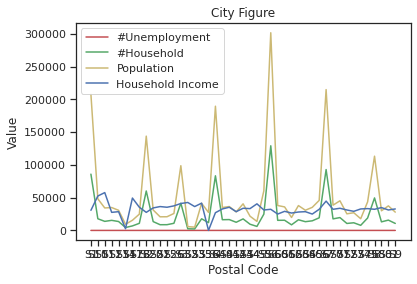

In [81]:
sns.set(style = 'ticks') #white background

sns.lineplot(x = 'postal_code', y = 'Unemployment', data = df_population, color = 'r', label = '#Unemployment')
sns.lineplot(x = 'postal_code', y = 'Household', data = df_population, color = 'g', label = '#Household')
sns.lineplot(x = 'postal_code', y = 'Population', data = df_population, color = 'y', label = 'Population')
sns.lineplot(x = 'postal_code', y = 'Household Income', data = df_population, color = 'b', label = 'Household Income')

plt.title ('City Figure')
plt.xlabel ('Postal Code')
plt.ylabel ('Value')

In [45]:
#Calculate the mean
df_population_mean = df_population[{'Household','Population','Household Income'}]
df_population_mean = df_population_mean.sum().reset_index().T
df_population_mean = df_population_mean.rename(columns=df_population_mean.iloc[0]).drop(df_population_mean.index[0])
df_population_mean

,Household Income,Household,Population
0,1474720,1033258,2418344


In [46]:
df_population['Household_mean'] = df_population['Household'] / df_population_mean['Household'][0]
df_population['Population_mean'] = df_population['Population'] / df_population_mean['Population'][0]
df_population['Household_Income_mean'] = df_population['Household Income'] / df_population_mean['Household Income'][0]
df_population.drop(['Household','Population','Household Income'], axis=1, inplace=True)
df_population


,Unemployment,postal_code,Household_mean,Population_mean,Household_Income_mean
0,0.0780,S1,0.083115,0.085890,0.020804
1,0.1050,S2,0.058249,0.059500,0.018688
2,0.1040,S3,0.040185,0.040839,0.027856
3,0.1800,S4,0.080678,0.078382,0.018336
4,0.1220,S5,0.024040,0.025003,0.021157
5,0.0570,S6,0.124999,0.124747,0.021862
6,0.0630,S7,0.089893,0.088874,0.030324
7,0.0560,S8,0.047981,0.046845,0.021862
8,0.1380,S9,0.010312,0.011538,0.022214
9,0.0330,S10,0.017219,0.019938,0.035614


In [48]:
postal_code_merged = my_concern.join(df_population.set_index('postal_code'), on='Neighborhood', how='left')
postal_code_merged

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,Unemployment,Household_mean,Population_mean,Household_Income_mean
0,S1,0.01000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.00,0.00000,0.000000,0.02000,0.01,0.00,0.000000,0.0780,0.083115,0.085890,0.020804
1,S10,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0330,0.017219,0.019938,0.035614
2,S11,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0410,0.013368,0.014170,0.039140
3,S12,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0540,0.014869,0.014430,0.018688
4,S13,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0650,0.013145,0.012698,0.019394
5,S14,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.333333,0.00000,0.00,0.00,0.000000,0.0910,0.004253,0.003897,0.001763
6,S17,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0280,0.006663,0.006402,0.033498
7,S18,0.00000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.000000,0.111111,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.0260,0.010482,0.010279,0.023977
8,S2,0.00000,0.000000,0.000000,0.200000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.1050,0.058249,0.059500,0.018688
9,S21,0.00000,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.052632,0.0430,0.008429,0.008592,0.024683


## Crime Rate

Crime rate also an important factor to me.

In [94]:
#Read data
df=pd.read_csv('Crime.csv')

#Collect Postal Code mapping
df_crime = df[{'Postal Code', 'Crime Dec2020'}]
df_crime.set_index('Postal Code')
df_crime.rename(columns={"Postal Code": "postal_code"}, inplace=True)
df_crime

,postal_code,Crime Dec2020
0,S1,223
1,S2,585
2,S3,221
3,S4,222
4,S5,752
5,S6,405
6,S7,78
7,S8,325
8,S9,362
9,S10,196


Text(0, 0.5, 'Value')

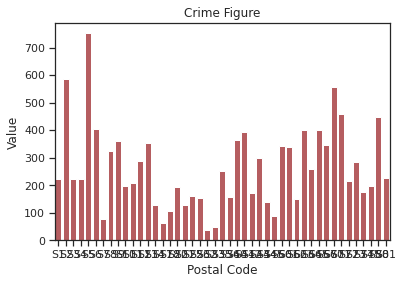

In [86]:
sns.set(style = 'ticks') #white background

sns.barplot(x = 'postal_code', y = 'Crime Dec2020', data = df_crime, color = 'r', label = '#Crime')

plt.title ('Crime Figure')
plt.xlabel ('Postal Code')
plt.ylabel ('Value')

In [92]:
df_crime_mean = df_crime[{'Crime Dec2020'}]
df_crime_mean = df_crime_mean.sum().reset_index().T
df_crime_mean = df_crime_mean.rename(columns=df_crime_mean.iloc[0]).drop(df_crime_mean.index[0])
df_crime_mean

,Crime Dec2020
0,11905


In [95]:
df_crime['crime_mean'] = (1 - (df_crime['Crime Dec2020'] / df_crime_mean['Crime Dec2020'][0])) /1000
df_crime.drop(['Crime Dec2020'], axis=1, inplace=True)
df_crime


,postal_code,crime_mean
0,S1,0.000981
1,S2,0.000951
2,S3,0.000981
3,S4,0.000981
4,S5,0.000937
5,S6,0.000966
6,S7,0.000993
7,S8,0.000973
8,S9,0.000970
9,S10,0.000984


In [96]:
postal_code_merged = my_concern.join(df_crime.set_index('postal_code'), on='Neighborhood', how='left')
postal_code_merged

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,crime_mean
0,S1,0.01000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.00,0.00000,0.000000,0.02000,0.01,0.00,0.000000,0.000981
1,S10,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000984
2,S11,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000983
3,S12,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000976
4,S13,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000970
5,S14,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.333333,0.00000,0.00,0.00,0.000000,0.000989
6,S17,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000995
7,S18,0.00000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.000000,0.111111,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000991
8,S2,0.00000,0.000000,0.000000,0.200000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000951
9,S21,0.00000,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.052632,0.000989


## Cluster Postal Code

This is the final step to make the model and render the result.

#### Run k-means to cluster the neighborhood into 5 clusters

In [97]:
# set number of clusters
kclusters = 5

postal_code_grouped_clustering = postal_code_merged.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(postal_code_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([0, 0, 1, 0, 1, 0, 2, 0, 0, 1], dtype=int32)

#### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [98]:
postal_code_merged.head()

,Neighborhood,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,crime_mean
0,S1,0.01,0.0,0.0,0.00,0.01,0.02,0.02,0.090000,0.01,0.09,0.0,0.0,0.0,0.02,0.01,0.0,0.0,0.000981
1,S10,0.00,0.0,0.0,0.25,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000984
2,S11,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.333333,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000983
3,S12,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000976
4,S13,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.250000,0.00,0.25,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.000970


In [102]:
# add clustering labels
postal_code_merged.insert(0, 'Cluster Labels', kmeans.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [101]:
#postal_code_merged.sort()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [103]:
# merge with df_zipcode to add latitude/longitude for each neighborhood
postal_code_merged = df_area_xy.join(postal_code_merged.set_index('Neighborhood'), on='postal_code', how='right')

postal_code_merged # check the last columns!

,area,postal_code,latitude,longitude,Cluster Labels,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Flea Market,crime_mean
0,Orchard Square,S1,53.381674,-1.470504,0,0.01000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.00,0.00000,0.000000,0.02000,0.01,0.00,0.000000,0.000981
45,Fulwood,S10,53.365013,-1.543243,0,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000984
51,Ecclesall,S11,53.355774,-1.511037,1,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.333333,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000983
55,Hackenthorpe,S12,53.343606,-1.381049,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000976
62,Handsworth,S13,53.372300,-1.383012,1,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.250000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000970
68,Rollestone,S14,53.346896,-1.441027,0,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00000,0.333333,0.00000,0.00,0.00,0.000000,0.000989
72,Dore,S17,53.326275,-1.540347,2,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.500000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000995
77,Dronfield,S18,53.301481,-1.469437,0,0.00000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.000000,0.111111,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000991
6,Arbourthorne,S2,53.361389,-1.443123,0,0.00000,0.000000,0.000000,0.200000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.000000,0.000951
85,Staveley,S21,53.363244,-1.474772,1,0.00000,0.000000,0.052632,0.000000,0.00,0.000000,0.000000,0.210526,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.052632,0.000989


In [104]:
postal_code_merged.dtypes

area                     object
postal_code              object
latitude                float64
longitude               float64
Cluster Labels            int32
Pharmacy                float64
Convenience Store       float64
Supermarket             float64
Grocery Store           float64
English Restaurant      float64
Indian Restaurant       float64
Chinese Restaurant      float64
Pub                     float64
Asian Restaurant        float64
Bar                     float64
Fast Food Restaurant    float64
Burger Joint            float64
Diner                   float64
Restaurant              float64
Fried Chicken Joint     float64
Fast Food Restaurant    float64
Flea Market             float64
crime_mean              float64
dtype: object

In [105]:
#Get coordinate for Sheffield City Centre
address = 'Sheffield S1, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Sheffield S1, United Kingdom are 53.3783713, -1.4621381.


In [106]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(postal_code_merged['latitude'], postal_code_merged['longitude'], postal_code_merged['postal_code'] + ' ' +  postal_code_merged['area'] , postal_code_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine Clusters

#### Cluster 1

In [107]:
postal_code_merged.loc[postal_code_merged['Cluster Labels'] == 0, postal_code_merged.columns[[0] + [1] + list(range(5, postal_code_merged.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,crime_mean
0,Orchard Square,S1,0.01000,0.000000,0.000000,0.000000,0.01,0.020000,0.020000,0.090000,0.010000,0.090000,0.00,0.00,0.00000,0.000000,0.02000,0.01,0.00,0.00,0.0,0.000981
45,Fulwood,S10,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000984
55,Hackenthorpe,S12,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000976
68,Rollestone,S14,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.333333,0.00000,0.00,0.00,0.00,0.0,0.000989
77,Dronfield,S18,0.00000,0.000000,0.000000,0.111111,0.00,0.000000,0.111111,0.000000,0.000000,0.111111,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000991
6,Arbourthorne,S2,0.00000,0.000000,0.000000,0.200000,0.00,0.000000,0.200000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000951
135,Bolsover,S44,0.02439,0.000000,0.000000,0.097561,0.00,0.024390,0.024390,0.048780,0.024390,0.048780,0.00,0.00,0.02439,0.000000,0.02439,0.00,0.00,0.00,0.0,0.000988
21,Firth Park,S5,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000937
26,Hillsborough,S6,0.00000,0.000000,0.083333,0.000000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.25,0.25,0.00000,0.000000,0.00000,0.00,0.25,0.25,0.0,0.000966
151,Rawmarsh,S62,0.00000,0.000000,0.000000,0.250000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00000,0.00,0.00,0.00,0.0,0.000987


#### Cluster 2 ~ 5

In [108]:
postal_code_merged.loc[postal_code_merged['Cluster Labels'] == 1, postal_code_merged.columns[[0] + [1] + list(range(5, postal_code_merged.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,crime_mean
51,Ecclesall,S11,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000983
62,Handsworth,S13,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.250000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000970
85,Staveley,S21,0.0,0.0,0.052632,0.000000,0.0,0.000000,0.0,0.210526,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.000989
103,Hathersage,S32,0.0,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000997
110,Ecclesfield,S35,0.0,0.0,0.200000,0.000000,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000979
118,Chesterfield,S40,0.0,0.0,0.117647,0.058824,0.0,0.000000,0.0,0.176471,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000970
122,Old Whittington,S41,0.0,0.4,0.000000,0.000000,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000967
130,Staveley,S43,0.0,0.0,0.052632,0.000000,0.0,0.000000,0.0,0.210526,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.052632,0.000975
140,"Moorgate, Rotherham",S60,0.0,0.0,0.000000,0.250000,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000971
146,Kimberworth Park,S61,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.250000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000972


In [109]:
postal_code_merged.loc[postal_code_merged['Cluster Labels'] == 2, postal_code_merged.columns[[0] + [1] + list(range(5, postal_code_merged.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,crime_mean
72,Dore,S17,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000995
180,"Brierley, Barnsley",S72,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000982


In [110]:
postal_code_merged.loc[postal_code_merged['Cluster Labels'] == 3, postal_code_merged.columns[[0] + [1] + list(range(5, postal_code_merged.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,crime_mean
18,Grimesthorpe,S4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000981


In [111]:
postal_code_merged.loc[postal_code_merged['Cluster Labels'] == 4, postal_code_merged.columns[[0] + [1] + list(range(5, postal_code_merged.shape[1]))]]

,area,postal_code,Pharmacy,Convenience Store,Supermarket,Grocery Store,English Restaurant,Indian Restaurant,Chinese Restaurant,Pub,Asian Restaurant,Bar,Fast Food Restaurant,Fast Food Restaurant,Burger Joint,Diner,Restaurant,Fried Chicken Joint,Fast Food Restaurant,Fast Food Restaurant,Flea Market,crime_mean
13,Burngreave,S3,0.0,0.0,0.250000,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000981
115,Stocksbridge,S36,0.0,0.0,0.222222,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000987
126,Clay Cross,S42,0.0,0.0,0.333333,0.166667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000985
138,Clay Cross,S45,0.0,0.0,0.333333,0.166667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000993
162,Rotherham,S65,0.0,0.0,0.200000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000966


,area,postal_code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Conclusions

The conclusions shown that S1, S10 is the best area to live.

Thanks

Text(0, 0.5, 'Value')

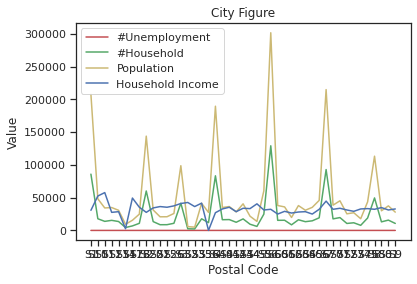

## 4. Cluster Neighborhoods

In [164]:
# set number of clusters
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0], dtype=int32)

In [165]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = df_downtown
downtown_merged.rename(columns={'neighbourhood': 'Neighborhood'}, inplace=True)

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head() # check the last columns!

,borough,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Regent Park,43.660706,-79.360457,0,Coffee Shop,Thai Restaurant,Restaurant,Fast Food Restaurant,Food Truck,Pub,Beer Store,Pool,Intersection,Electronics Store
1,Downtown Toronto,Harbourfront,43.640080,-79.380150,0,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Plaza,Sporting Goods Shop,Sports Bar,Steakhouse,Pizza Place
2,Downtown Toronto,Queen's Park,43.659659,-79.390340,0,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Japanese Restaurant,Bank,Bubble Tea Shop,Juice Bar,French Restaurant,Thai Restaurant
3,Downtown Toronto,Ontario Provincial Government,46.429123,-80.952090,2,Tree,Women's Store,Distribution Center,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
4,Downtown Toronto,Garden District,43.656500,-79.377114,0,Clothing Store,Hotel,Coffee Shop,Sandwich Place,Café,Lingerie Store,Theater,Pizza Place,Japanese Restaurant,Cosmetics Shop


In [167]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['latitude'], downtown_merged['longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters